# IBM Qiskit Workshop

# How to Use this Notebook in your IBM Quantum Lab Account

1. go to (ADD IBM BIZ LINK)
2. click 'raw' button in GitHub, this will open the notebook file in a new tab
![](raw_button.png)

3. Right click on the raw file and save the file in jupyter notebook format (`.ipynb`)
![](save.png)

4. In IBM Quantum Lab, select upload button on in top left and upload the notebook file
![](upload_button.png)

5. If you didn't save it in `.ipynb` format you can rename the file in the jupyter lab
![](rename_button.png)

6. Now you can open the notebook in your IBM Quantum Lab environment! (note: if you want the images to display in your lab version you will need to download them from the github folder where the notebook is and upload it into your lab folder as well)

![](open_notebook.png)

Goal: Show you the toolbox! Breadth not depth, raise your hand if you have questions!

Contents:
- Welcome & About Me!
- Let's Explore IBM Quantum Labs, composer, services etc.
- What is Qiskit?
    - The Main Qiskit Packages
    - The Broader Qiskit Ecosystem (incl. support for open-source community projects)
- Overview of the Main Qiskit Packages
- Overview of Qiskit Terra Module
- Using Simulators & Real Hardware (e.g. Stanford Premium Systems)
- What Next?

## About Me

Abby Mitchell - Quantum Developer Advocate, IBM

**Personal website:** https://abbymitchell.dev

**GitHub:** https://github.com/javabster

**Linkedin:** https://www.linkedin.com/in/abby-mitchell/

**Twitter:** https://twitter.com/javabster

## Let's Explore! 

https://quantum-computing.ibm.com/

- All IBM Quantum Hardware Systems: https://quantum-computing.ibm.com/services/resources?tab=systems
  - up tp 7Q on open systems
- IBM Quantum Composer (good for beginners!): https://quantum-computing.ibm.com/composer
- IBM Quantum Lab: https://lab.quantum-computing.ibm.com/

# Qiskit Main Packages

![](qiskit_overview.png)

What we'll focus on: mostly Terra
If we have time: other packages

# Beyond the Main Packages - The Qiskit Ecosystem

https://qiskit.org/ecosystem

3 Tiers:
- Main
- Extensions
- Community

-> You can submit your open-source project to the Ecosystem!

# Time for some code! (finally!)

In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# Core Capabilities - Qiskit (Terra)

### (some) Submodules

Representing Quantum States:
- [Quantum Circuits](https://qiskit.org/documentation/apidoc/circuit.html) (qiskit.circuit)
- [Quantum Information](https://qiskit.org/documentation/apidoc/quantum_info.html) (qiskit.quantum_info)
- [Operators](https://qiskit.org/documentation/apidoc/opflow.html) (qiskit.opflow)


Running on devices and getting results:
- (A short side quest into Simulators and Hardware)
- [Transpiler](https://qiskit.org/documentation/apidoc/transpiler.html) (qiskit.transpiler)
- [Visualization](https://qiskit.org/documentation/apidoc/visualization.html) (qiskit.visualization)


Close to hardware:
- [Pulse](https://qiskit.org/documentation/apidoc/pulse.html) (qiskit.pulse)


Far away from hardware:
- [Algorithms](https://qiskit.org/documentation/apidoc/algorithms.html) (qiskit.algorithms)


NEW! Runtime Primitives
- [Primitives](https://qiskit.org/documentation/apidoc/primitives.html) (qiskit.primitives)


Other modules: https://qiskit.org/documentation/apidoc/terra.html

## Quantum Circuit

Gates are matrices, applying gates is matrix multiplaction

Simplest example - the Bell State

In [6]:
from qiskit import QuantumCircuit

# Initialize quantum circuit
bell = QuantumCircuit(2)

# Apply gates
bell.h(0)
bell.cx(0,1)

# Measure qubits
bell.measure_all()

# Visualise circuit
print(bell)

        ┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas_0: ══════════════╩══╬═
                         ║ 
meas_1: ═════════════════╩═
                           


In [21]:
# custom rotations

circuit = QuantumCircuit(1)
circuit.u(np.pi/2,np.pi/2,np.pi/2,0)

print(circuit)

   ┌────────────────┐
q: ┤ U(π/2,π/2,π/2) ├
   └────────────────┘


In [19]:
# matrix -> unitary gate

matrix = [[0, 0, 0, 1],
          [0, 0, 1, 0],
          [1, 0, 0, 0],
          [0, 1, 0, 0]]
          
circuit = QuantumCircuit(2)
circuit.unitary(matrix, [0, 1])

print(circuit)

     ┌──────────┐
q_0: ┤0         ├
     │  Unitary │
q_1: ┤1         ├
     └──────────┘


In [18]:
print(circuit.decompose())

global phase: 1.5695
     ┌───────────────────┐     ┌───────────────────┐
q_0: ┤ U3(π/2,0.18021,0) ├──■──┤ U3(π/2,-π,2.9614) ├
     ├───────────────────┤┌─┴─┐├───────────────────┤
q_1: ┤ U3(π/2,0,-1.5695) ├┤ X ├┤ U3(π/2,-1.5695,0) ├
     └───────────────────┘└───┘└───────────────────┘


In [17]:
qc = QuantumCircuit(2)

# State Preparation
# qc2.prepare_state('01')
# qc2.prepare_state([0,1, 0, 0])
qc.prepare_state(2)

print(qc)

     ┌───────────────────────┐
q_0: ┤0                      ├
     │  State Preparation(2) │
q_1: ┤1                      ├
     └───────────────────────┘


In [20]:
print(qc.decompose())

          
q_0: ─────
     ┌───┐
q_1: ┤ X ├
     └───┘


**Parametric Circuits** - Great for Variational Algorithms

In [16]:
from qiskit.circuit import Parameter

# Define a variable theta to be a parameter with name 'theta'
theta = Parameter('theta')

# Initialize a quantum circuit with one qubit
quantum_circuit = QuantumCircuit(1)

# Add a parametrized RX rotation on the qubit
quantum_circuit.rx(theta, 0)

print(quantum_circuit)

   ┌───────────┐
q: ┤ Rx(theta) ├
   └───────────┘


In [24]:
# Set the value of the parameter
theta_value = np.pi

# Bind the value to the parametrized circuit
qc = quantum_circuit.bind_parameters({theta: theta_value})

print(quantum_circuit)

   ┌───────────┐
q: ┤ Rx(theta) ├
   └───────────┘


**Control Flow Operations - new syntax for Qiskit Terra 0.23!**

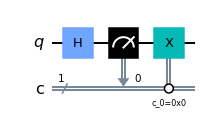

In [7]:
# old way

qc = QuantumCircuit(1, 1)
qc.h(0)
qc.measure(0, 0)
qc.x(0).c_if(0, False)
qc.draw()

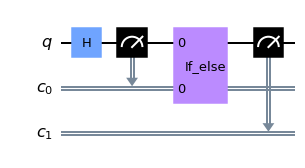

In [6]:
qc = QuantumCircuit(1, 2)
qc.h(0)  # This is just a stand-in for more complex real-world setup.
qc.measure(0, 0)

# Unlike c_if, we can have more than one instruction in the block, and it only
# requires a single evaluation of the condition.  That's especially important if
# the bit is written to part way through the block.
with qc.if_test((0, True)): # if q0 == 1, reset and flip it
    qc.reset(0)
    qc.x(0)
qc.measure(0, 1)

qc.draw()
# backend.run(qc).result().get_counts()  # {'00': 0.5, '11': 0.5}

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/circuit/matplotlib.py:321: RuntimeWarning: Cregbundle set to False since an instruction needs to refer to individual classical wire
  self._get_layer_widths()


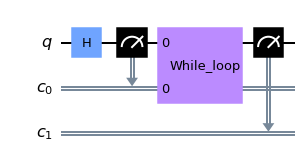

In [2]:
# Repeat instructions until success with while loop
# Previously this wasn't representable in Qiskit at all, because we didn't have
# any concept of a run-time loop.

qc = QuantumCircuit(1, 2)
qc.h(0)
qc.measure(0, 0)
with qc.while_loop((0, False)): # as long as q0 == 0, reset, add h and measure again until q0 == 1
    qc.reset(0)
    qc.h(0)
    qc.measure(0, 0)
qc.measure(0, 1)

qc.draw()
# backend.run(qc).result().get_counts()  # {'11': 1}

## Quantum Info

In [17]:
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.quantum_info import process_fidelity

In [18]:
XX = Operator([[0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0], [1, 0, 0, 0]])
XX

Operator([[0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

Other Qiskit classes can be converted to `Operator`s

- `Pauli` objects (also from quantum info module)

- `Gate` and `Instruction` objects

- `QuantumCircuit` objects

In [19]:
# Create an Operator from a Pauli object

pauliXX = Pauli('XX')
Operator(pauliXX)

Operator([[0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

In [22]:
from qiskit.extensions import CXGate

# Create an Operator for a Gate object
Operator(CXGate())

Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

In [21]:
# Create an operator from a QuantumCircuit object
circ = QuantumCircuit(10)
circ.h(0)
for j in range(1, 10):
    circ.cx(j-1, j)

# Convert circuit to an operator by implicit unitary simulation
Operator(circ)

Operator([[ 0.70710678+0.j,  0.70710678+0.j,  0.        +0.j, ...,
            0.        +0.j,  0.        +0.j,  0.        +0.j],
          [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j, ...,
            0.        +0.j,  0.        +0.j,  0.        +0.j],
          [ 0.        +0.j,  0.        +0.j,  0.        +0.j, ...,
            0.        +0.j,  0.        +0.j,  0.        +0.j],
          ...,
          [ 0.        +0.j,  0.        +0.j,  0.        +0.j, ...,
            0.        +0.j,  0.        +0.j,  0.        +0.j],
          [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j, ...,
            0.        +0.j,  0.        +0.j,  0.        +0.j],
          [ 0.70710678+0.j, -0.70710678+0.j,  0.        +0.j, ...,
            0.        +0.j,  0.        +0.j,  0.        +0.j]],
         input_dims=(2, 2, 2, 2, 2, 2, 2, 2, 2, 2), output_dims=(2, 2, 2, 2, 2, 2, 2, 2, 2, 2))

In [29]:
# Create operators
X = Operator(Pauli('X'))
Y = Operator(Pauli('Y'))

# X.tensor(Y) # X tensor Y
# X.compose(Y) # YX

Operator([[0.-1.j, 0.+0.j],
          [0.+0.j, 0.+1.j]],
         input_dims=(2,), output_dims=(2,))

In [25]:
# Create an operator
XX = Operator(Pauli('XX'))

# Add to a circuit
circ = QuantumCircuit(2, 2)
circ.append(XX, [0, 1])
circ.measure([0,1], [0,1])
print(circ)

     ┌──────────┐┌─┐   
q_0: ┤0         ├┤M├───
     │  Unitary │└╥┘┌─┐
q_1: ┤1         ├─╫─┤M├
     └──────────┘ ║ └╥┘
c: 2/═════════════╩══╩═
                  0  1 


In [26]:
# Add to Pauli operator to circuit
circ2 = QuantumCircuit(2, 2)
circ2.append(Pauli('XX'), [0, 1])
circ2.measure([0,1], [0,1])
print(circ2)

     ┌────────────┐┌─┐   
q_0: ┤0           ├┤M├───
     │  Pauli(XX) │└╥┘┌─┐
q_1: ┤1           ├─╫─┤M├
     └────────────┘ ║ └╥┘
c: 2/═══════════════╩══╩═
                    0  1 


## Opflow

"The Operator Flow is meant to serve as a lingua franca between the theory and implementation of Quantum Algorithms & Applications. Meaning, the ultimate goal is that when theorists speak their theory in the Operator Flow, they are speaking valid implementation, and when the engineers speak their implementation in the Operator Flow, they are speaking valid physical formalism. To be successful, it must be fast and physically formal enough for theorists to find it easier and more natural than hacking Matlab or NumPy, and the engineers must find it straightforward enough that they can learn it as a typical software library, and learn the physics naturally and effortlessly as they learn the code."

In [30]:
from qiskit.opflow import I, X, Y, Z, Zero, One

print(X.to_circuit())
print(Y.to_circuit())
print(Z.to_circuit())
print(I.to_circuit())

   ┌───┐
q: ┤ X ├
   └───┘
   ┌───┐
q: ┤ Y ├
   └───┘
   ┌───┐
q: ┤ Z ├
   └───┘
   
q: 
   


Algebraic operations

`+` - addition

`-` - subtraction, negation (scalar multiplication by -1)

`*` - scalar multiplication

`/` - scalar division

`@` - composition (equivalent to calling `.compose()`)

`^` - tensor product or tensor power (tensor with self n times)

`**` - composition power (compose with self n times)

`==` - equality

`~` - adjoint, alternating between a State Function and Measurement

How do we write this with OpFlow on 3 qubits?

$$\hat{H} = \sum_{i=0}^{1} \hat{\sigma}_x^{(i)} \hat{\sigma}_x^{(i+1)}  + \sum_{i=0}^{1} \hat{\sigma}_y^{(i)} \hat{\sigma}_y^{(i+1)} $$

Note: The superscripts associated with the operators in the Hamiltonian (for example (i) in σₓ⁽ⁱ⁾) correspond to the qubit to which the operator is being applied to. So for i = 0, this term: σₓ⁽⁰⁾σₓ⁽⁰⁺¹⁾ indicates there is an X applied to qubit 0, and an X applied to qubit 1, no operator (or an identity) applied to qubit 2. The opflow notation for this term then is I^X^X

In [44]:
H = (I^X^X) + (X^X^I) + (I^Y^Y) + (Y^Y^I)

What's the difference between Quantum Info and OpfLow?

- Quantum for representing matrix operations on quantum systems
- Opflow for more advanced algebra

# Hold on - how do we actually get results?

### It's time for a quick side quest into Similators

## Simulator - Qiskit Aer 

In [12]:
from qiskit import Aer

Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

Let's simulate some results from our bell state

In [4]:
print(bell)

        ┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1 


In [57]:
from qiskit import transpile

# choose simulator backend
simulator = Aer.get_backend('aer_simulator')

# Transpile for simulator
bell_circ = transpile(bell, simulator)

# Run and get counts
result = simulator.run(bell_circ).result()
counts = result.get_counts(bell_circ)
print(counts)

{'11': 528, '00': 496}


In [6]:
# get results for each shot

result = simulator.run(bell_circ, shots=10, memory=True).result()
memory = result.get_memory(bell_circ)
print(memory)

['00', '00', '00', '11', '11', '11', '11', '00', '11', '00']


Simulate with Noise

In [14]:
from qiskit.providers.fake_provider import FakeBelem
from qiskit.providers.aer import AerSimulator

# initialise simulator based on fake backend
device_backend = FakeBelem()
sim_bel = AerSimulator.from_backend(device_backend)

# Transpile the circuit for the noisy basis gates
tcirc = transpile(bell, sim_bel)

# Execute noisy simulation and get counts
result_noise = sim_bel.run(tcirc).result()
counts_noise = result_noise.get_counts(0)

print(counts)
print(counts_noise)


{'00': 499, '11': 525}
{'01': 48, '11': 433, '10': 46, '00': 497}


In [74]:
# get statevector info
# (must construct quantum circuit without measure)

circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0,1)

circ.save_statevector()

# choose simulator backend
sim = Aer.get_backend('aer_simulator')

# Transpile for simulator
tr_circ = transpile(circ, sim)

# Run and get counts
sv_res = sim.run(tr_circ).result()

array_to_latex(sv_res.get_statevector())


<IPython.core.display.Latex object>

In [75]:
# get unitary matrix for circ with simulator
# (must construct quantum circuit without measure)

circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0,1)

circ.save_unitary()

# choose simulator backend
sim = Aer.get_backend('aer_simulator')

# Transpile for simulator
tr_circ = transpile(circ, sim)

# Run and get counts
u_res = sim.run(tr_circ).result()

array_to_latex(u_res.get_unitary())


<IPython.core.display.Latex object>

## Real Hardware 🎉 (+ Stanford Hub)

In [3]:
from qiskit.tools.jupyter import *
%qiskit_backend_overview

In [4]:
from qiskit.providers.ibmq import least_busy

# (provider= ibm open gruop, auto-loaded at top imports)
least_busy_device = least_busy(provider.backends(simulator=False, filters=lambda b: b.configuration().n_qubits >= 2))

least_busy_device

<IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>

In [33]:
# Transpile for real device
# bell_circ_real = transpile(bell, least_busy_device)

# # Run and get counts
# result = least_busy_device.run(bell_circ_real).result()
# counts_real = result.get_counts(bell_circ_real)
# print(counts_real)

{'00': 1926, '01': 165, '10': 142, '11': 1767}


(See Lab jobs tab for job progress)

### Using the Stanford Hub

Systems available via the Stanford Hub:
- Washington (127Q)
- Auckland (27Q)
- Cairo (27Q)
- Geneva (27Q)
- Hanoi (27Q)
- Montreal (27Q)
- Mumbai (27Q)
- Toronto (27Q)
- Kolkata (27Q)
- Guadalupe (17Q)
- Lagos (7Q)
- Nairobi (7Q)
- Oslo (7Q)
- Jakarta (7Q)
- Perth (7Q)
- Belem (5Q)
- Lima (5Q)
- Manila (5Q)
- Quito (5Q)

Request access to Stanford Hub: Reach out to your  Stanford Administrators  Ruth  Marinshaw (ruthm@stanford.edu) and Adam Seishas (aseishas@stanford.edu) to  get added to  the Stanford  Hub

In [ ]:
# stanford_provider = IBMQ.get_provider('ibm-q-stanford', 'your-group-name', 'your-project-name')

# st_backend = stanford_provider.get_backend('ibmq_manila')

# st_result = st_backend.run(bell_circ_real).result()

# counts_real = result.get_counts(bell_circ_real)

Qiskit is backend agnostic!

In [ ]:
# !pip install qiskit-ionq

# from qiskit_ionq import IonQProvider
# provider = IonQProvider()

# ionq_backend = provider.get_backend("ionq_qpu")
# job = ionq_backend.run(bell)

# plot_histogram(job.get_counts())

### Side Quest Complete ✅ Back to Qiskit Terra!

## Visualisation

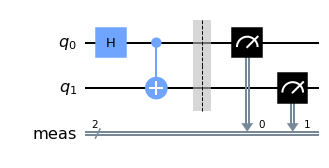

In [ ]:
bell.draw()

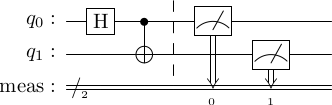

In [ ]:
bell.draw(output='latex')

In [20]:
bell.draw(output='text')

┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

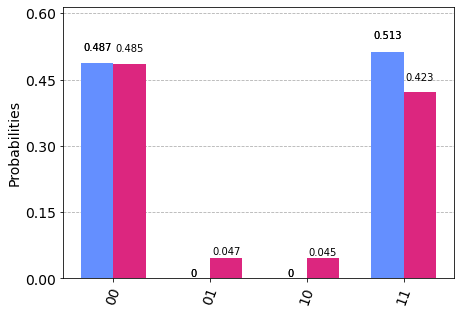

In [21]:
from qiskit.visualization import plot_histogram

data = [counts, counts_noise]

plot_histogram(data)

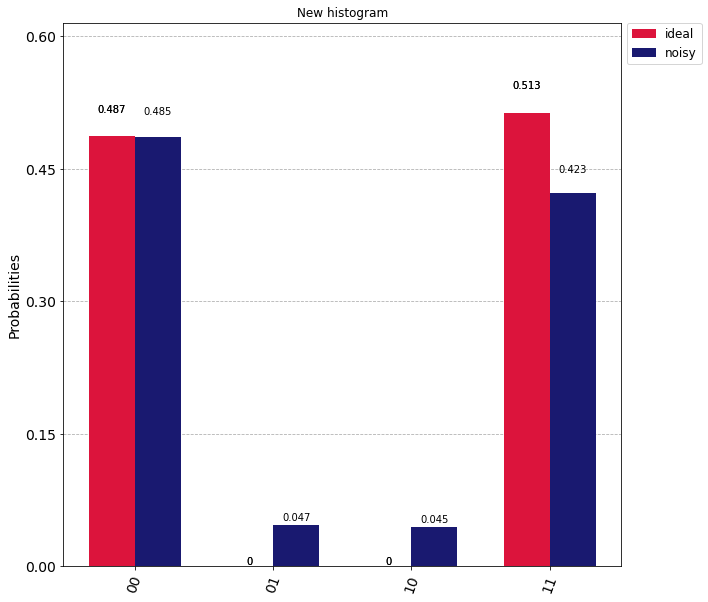

In [22]:
legend = ['ideal', 'noisy']
title = 'New histogram'
figsize = (10,10)
color=['crimson','midnightblue']
plot_histogram(data, legend=legend, title=title, figsize=figsize, color=color)

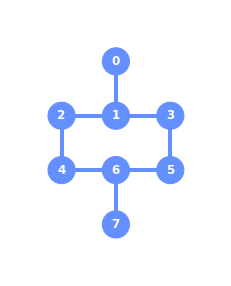

In [28]:
# visualise coupling maps (for device layouts) - small heavy hex

from qiskit.visualization import plot_coupling_map

num_qubits = 8
qubit_coordinates = [[0, 1], [1, 1], [1, 0], [1, 2], [2, 0], [2, 2], [2, 1], [3, 1]]
coupling_map = [[0, 1], [1, 2], [1, 3], [3, 5], [4, 6], [4, 5], [2, 4], [6, 7]]
plot_coupling_map(num_qubits, qubit_coordinates, coupling_map)

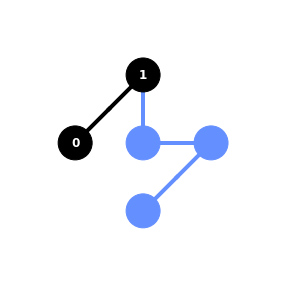

In [9]:
# visualise how your qubits will be laid out on a given device

from qiskit.visualization import plot_circuit_layout

backend = provider.get_backend('ibmq_manila')

belem_bell = transpile(bell, backend=backend)

plot_circuit_layout(belem_bell, backend)

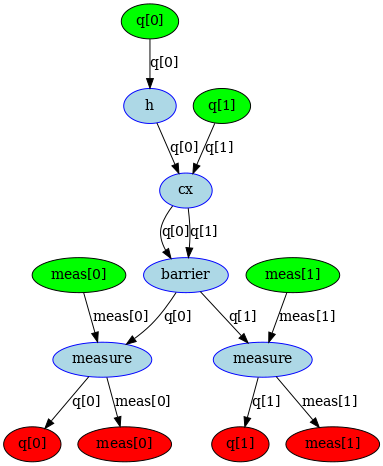

In [30]:
# DAG Drawer
from qiskit.dagcircuit import DAGCircuit
from qiskit.converters import circuit_to_dag
from qiskit.visualization import dag_drawer

dag = circuit_to_dag(bell)
dag_drawer(dag)

## Transpiler

![](transpiler.png)

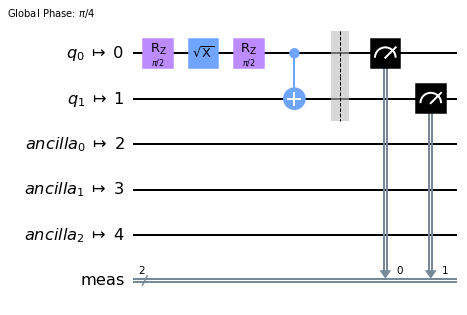

In [34]:
backend = provider.get_backend('ibmq_belem')

transpiled_circ = transpile(bell, backend)
transpiled_circ.draw()

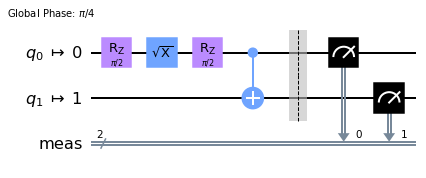

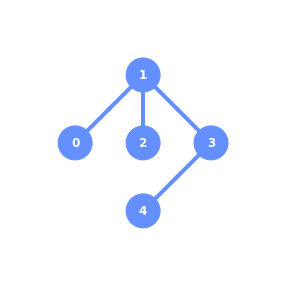

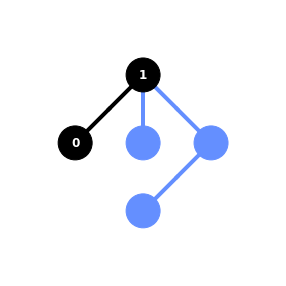

In [21]:
from qiskit.visualization import plot_circuit_layout, plot_gate_map

display(transpiled_circ.draw(idle_wires=False))
display(plot_gate_map(backend))
plot_circuit_layout(transpiled_circ, backend)

In [16]:
# a slightly more interesting example:

circuit = QuantumCircuit(5)
circuit.h(range(5))
circuit.cx(0, range(1,5))
circuit.h(range(5))
circuit.cx(4, range(4))
circuit.h(range(5))
circuit.measure_all()

In [17]:
# This time with a coupling map but no actual backend

from qiskit.transpiler import CouplingMap

cmap = CouplingMap.from_heavy_hex(3)

print(cmap)

[[0, 13], [1, 13], [13, 0], [13, 1], [1, 14], [2, 14], [14, 1], [14, 2], [3, 15], [4, 15], [15, 3], [15, 4], [4, 16], [5, 16], [16, 4], [16, 5], [6, 17], [7, 17], [17, 6], [17, 7], [7, 18], [8, 18], [18, 7], [18, 8], [0, 9], [3, 9], [9, 0], [9, 3], [5, 12], [8, 12], [12, 5], [12, 8], [10, 14], [10, 16], [14, 10], [16, 10], [11, 15], [11, 17], [15, 11], [17, 11]]


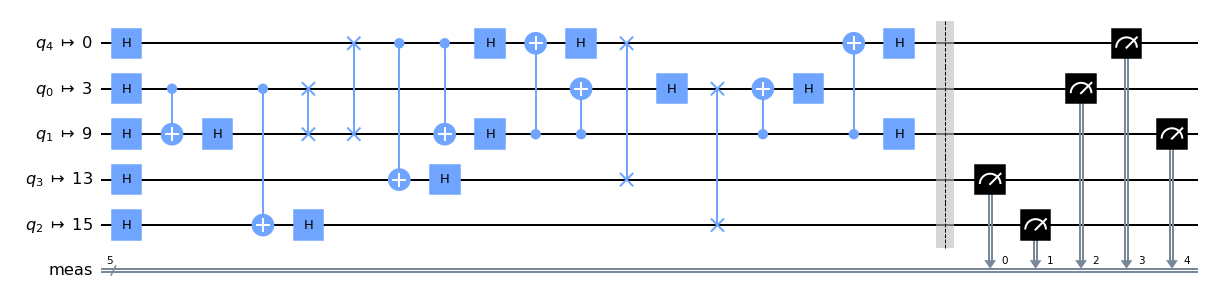

In [18]:
transpiled = transpile(circuit, coupling_map=cmap)
transpiled.draw(idle_wires=False, fold=-1)

**Optimization level**

Higher levels generate more optimized circuits, at the expense of longer transpilation time.

- 0: no explicit optimization other than mapping to backend 
- 1: light optimization by simple adjacent gate collapsing.(default) 
- 2: medium optimization by noise adaptive qubit mapping and gate cancellation using commutativity rules. 
- 3: heavy optimization by noise adaptive qubit mapping and gate cancellation using commutativity rules and unitary synthesis.

In [19]:
level0 = transpile(circuit, coupling_map=cmap, optimization_level=0)
level1 = transpile(circuit, coupling_map=cmap, optimization_level=1)
level2 = transpile(circuit, coupling_map=cmap, optimization_level=2)
level3 = transpile(circuit, coupling_map=cmap, optimization_level=3)

In [20]:
for idx, level in enumerate([level0, level1, level2, level3]):
    print("level"+str(idx), level.count_ops()['cx'], level.depth())

level0 8 21
level1 8 17
level2 8 17
level3 6 12


In [25]:
# transpiling is a stochastic process
transpiled = transpile(circuit, coupling_map=cmap, optimization_level=3)
transpiled.depth()

17

In [29]:
transpiled = transpile(circuit, coupling_map=cmap, optimization_level=2, seed_transpiler=1)
transpiled.depth()

17

The transpiler is highly configurable

In [ ]:
# lots of args
transpile

* Pro Tip! Cmd + I for documentation/source code

In [41]:
# make a custom transpiler and plugin to Qiskit
# https://qiskit.org/documentation/apidoc/transpiler_plugins.html
transpile(circuit, routing_method="your-custom-plugin", optimization_level=2)

## Pulse

Pulse programs, which are called Schedules, describe instruction sequences for the control electronics of a given device. A schedule specifies the exact time dynamics of the input signals across all input channels to the device. There are usually multiple channels per qubit, such as drive and measure. This interface is more powerful, and requires a deeper understanding of the underlying device physics.

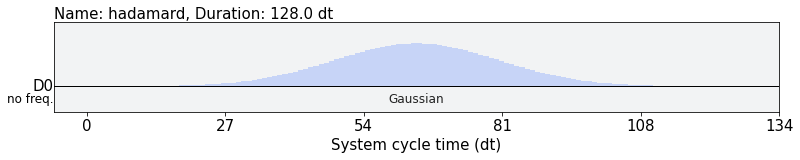

In [47]:
# Let's create a pulse schedule for our own calibration of a H gate

from qiskit import pulse
from qiskit.pulse.library import Gaussian

backend = provider.get_backend('ibmq_belem')

with pulse.build(backend, name='hadamard') as h_q0:
    pulse.play(Gaussian(duration=128, amp=0.1, sigma=16), pulse.drive_channel(0))
    
h_q0.draw()

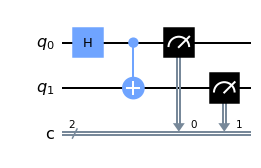

In [48]:
circ = QuantumCircuit(2, 2)
circ.h(0)
circ.cx(0, 1)
circ.measure(0, 0)
circ.measure(1, 1)

circ.draw()

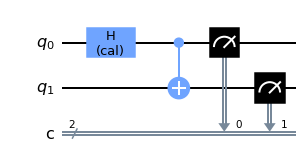

In [49]:
#lets replace the default H with our calibrated H

circ.add_calibration('h', [0], h_q0)

circ.draw()

Now can transpile and run as you normally would.

You can also create custom gates with custom callibrations, or build up a schedule of multiple calibrations. To do this we can build up a schedule of pulse instructions operating on different channels. All pulse schedules have a similar format:

In [51]:
from qiskit import pulse

with pulse.build(name='my_example') as my_program:
    # Add instructions here
    pass

my_program

ScheduleBlock(, name="my_example", transform=AlignLeft())

Schedule Instructions:
- `delay`(duration, channel)
- `play`(pulse, channel)
- `set_frequency` (frequency, channel)
- `shift_phase` (phase, channel)
- `acquire` (duration, channel, mem_slot, reg_slot)

Each instruction type has its own set of operands. As you can see above, they each include at least one Channel to specify where the instruction will be applied.

Channels are labels for signal lines from the control hardware to the quantum chip.

- `DriveChannels` are typically used for driving single qubit rotations,
- `ControlChannels` are typically used for multi-qubit gates or additional drive lines for tunable qubits,
- `MeasureChannels` are specific to transmitting pulses which stimulate readout, and
- `AcquireChannels` are used to trigger digitizers which collect readout signals.

`DriveChannels`, `ControlChannels`, and `MeasureChannels` are all `PulseChannels`; this means that they support transmitting pulses, whereas the `AcquireChannel` is a receive channel only and cannot play waveforms.


For the following examples, we will create one `DriveChannel` instance for each `Instruction` that accepts a `PulseChannel`. `Channels` take one integer index argument. Except for `ControlChannels`, the index maps to the qubit label.

In [55]:
from qiskit.pulse import DriveChannel

channel = DriveChannel(0)

**Play instruction**

The play instruction is responsible for executing pulses. It's straightforward to add a play instruction:

```
with pulse.build() as sched:
    pulse.play(pulse, channel)
```

A `Pulse` specifies an arbitrary pulse envelope. The modulation frequency and phase of the output waveform are controlled by the `set_frequency` and `shift_phase` instructions.

E.g. Let's build our Gaussian pulse using the Gaussian parametric pulse.

**Parametric pulses**  
A parametric pulse sends the name of the function and its parameters to the backend, rather than every individual sample. Using parametric pulses makes the jobs you send to the backend much smaller. IBM Quantum backends limit the maximum job size that they accept, so parametric pulses may allow you to run larger programs.

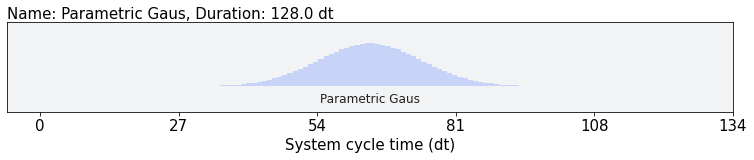

In [52]:
from qiskit.pulse import library

amp = 1
sigma = 10
num_samples = 128

gaus = pulse.library.Gaussian(num_samples, amp, sigma,
                              name="Parametric Gaus")
gaus.draw()

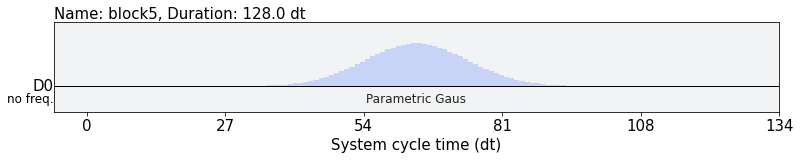

In [56]:
with pulse.build() as schedule:
    pulse.play(gaus, channel)
schedule.draw()

The pulse Schedule is independent of the backend it runs on. However, we can build our program in a context that is aware of the target backend by supplying it to `pulse.build`. When possible you should supply a backend. In order to add acquire channels to your pulse schedule you need to specify a backend

In [61]:
from qiskit.providers.fake_provider import FakeValencia

backend = FakeValencia()

with pulse.build(backend=backend, name='backend_aware') as backend_aware_program:
    # instructions
    pass
    
backend_aware_program

ScheduleBlock(, name="backend_aware", transform=AlignLeft())

The acquire instruction triggers data acquisition for readout. It takes a duration, an `AcquireChannel` which maps to the qubit being measured, and a `MemorySlot`. The `MemorySlot` is classical memory where the readout result will be stored. For this we require a backend

In [62]:
from qiskit.pulse import Acquire, AcquireChannel, MemorySlot

with pulse.build(backend) as schedule:
    pulse.acquire(1200, pulse.acquire_channel(0), MemorySlot(0))

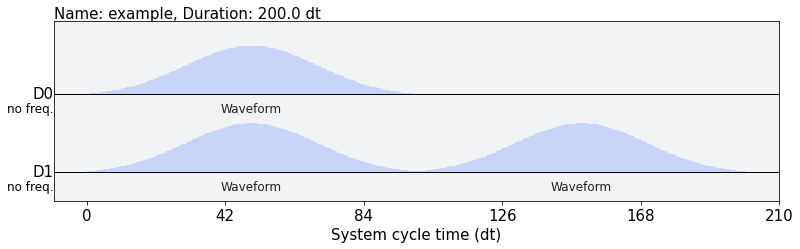

In [67]:
with pulse.build(backend, name='example') as program:
        gaussian_pulse = library.gaussian(100, 0.5, 20)
        pulse.play(gaussian_pulse, pulse.drive_channel(0))
        pulse.play(gaussian_pulse, pulse.drive_channel(1))
        pulse.play(gaussian_pulse, pulse.drive_channel(1))

program.draw()

## Algorithms (and Optimisers)

Qiskit provides a number of Algorithms in this module and they are grouped by category according to the task they can perform. For instance Minimum Eigensolvers to find the smallest eigen value of an operator, (e.g ground state energy of a chemistry Hamiltonian or a solution to an optimization problem when expressed as an Ising Hamiltonian). There are Linear Solvers for linear systems of equations problems and Amplitude Estimators for value estimation that can be used say in financial applications.

Algorithms are configurable and often part of the configuration will be in the form of smaller building blocks, of which different instances of the building block type can be given. For instance with VQE, the Variational Quantum Eigensolver, it takes a trial wavefunction, in the form of a QuantumCircuit and a classical optimizer among other things.

E.g. Ground State of Chemistry Hamiltonian

Build VQE from scratch: https://qiskit.org/textbook/ch-applications/vqe-molecules.html

In [69]:
from qiskit.utils import QuantumInstance

backend = Aer.get_backend('aer_simulator')
quantum_instance = QuantumInstance(backend=backend, shots=800, seed_simulator=99)

In [70]:
from qiskit.opflow import X, Z, I

H2_op = (-1.052373245772859 * I ^ I) + \
        (0.39793742484318045 * I ^ Z) + \
        (-0.39793742484318045 * Z ^ I) + \
        (-0.01128010425623538 * Z ^ Z) + \
        (0.18093119978423156 * X ^ X)

In [72]:
from qiskit.utils import algorithm_globals
from qiskit.algorithms import VQE
from qiskit.algorithms.optimizers import SLSQP
from qiskit.circuit.library import TwoLocal

seed = 50
algorithm_globals.random_seed = seed
qi = QuantumInstance(Aer.get_backend('statevector_simulator'), seed_transpiler=seed, seed_simulator=seed)

ansatz = TwoLocal(rotation_blocks='ry', entanglement_blocks='cz')
slsqp = SLSQP(maxiter=1000)
vqe = VQE(ansatz, optimizer=slsqp, quantum_instance=qi)
result = vqe.compute_minimum_eigenvalue(H2_op)
print(result)

{   'aux_operator_eigenvalues': None,
    'cost_function_evals': 65,
    'eigenstate': array([ 9.55146158e-05+0.j, -9.93766272e-01+0.j,  1.11483575e-01+0.j,
        1.77493990e-05+0.j]),
    'eigenvalue': (-1.8572750175664259+0j),
    'optimal_circuit': None,
    'optimal_parameters': {   ParameterVectorElement(θ[7]): 0.3602072577510429,
                              ParameterVectorElement(θ[2]): 0.5470754664946292,
                              ParameterVectorElement(θ[1]): 4.426962083985579,
                              ParameterVectorElement(θ[5]): 1.5683260003556614,
                              ParameterVectorElement(θ[4]): -2.5983258978150006,
                              ParameterVectorElement(θ[0]): 4.296520455019831,
                              ParameterVectorElement(θ[3]): 6.092947779034692,
                              ParameterVectorElement(θ[6]): -4.717618171283927},
    'optimal_point': array([ 4.29652046,  4.42696208,  0.54707547,  6.09294778, -2.5983259 ,
        

In [ ]:
# other examples - Grover's, QAOA

## Primitives - New Feature 🎉

ADD TEXT

To understand Qiskit Runtime Primitives we need to take a trip down IBM Quantum memory lane...

![](circuit_flow.png)

![](runtime_prog_flow.png)

![](circ_runtime_comparison.png)

![](what_we_want.png)

![](primitives.png)

![](primitives_comparison.png)

![](sampler_estimator.png)


#### Simple Sampler Example

In [1]:
bell.draw()

NameError: name 'bell' is not defined

In [ ]:
from qiskit.primitives import Sampler

sampler = Sampler(options={"shots": 100})
job = sampler.run(bell) # uses local simulator under the hood
result = job.result()

print(result)

#### Simple Estimator Example

In [ ]:
observable = SparsePauliOp(["ZZ"])
ansatz = EfficientSU2(2, reps=1).decompose()
values = np.random(ansatz.num_parameters)

ansatz.draw()

In [ ]:
from qiskit.primitives import Estimator

estimator = Estimator()
job = Estimator.run(3*[ansatz], 3*[observable], 3*[values]) # calls simulator under the hood
result = job.result()

print(result)

![](primitives_code.png)

#### Use Primitives with IBM Devices via Sessions - Still in development 🛠

If you want to get results from IBM hardware using primitives, you need to use the `qiskit_ibm_runtime` provider, which facilitates the connection to the IBM hardware via sessions.

In [ ]:
from qiskit.algorithsm import VQE
from qiskit_ibm_runtime import QiskitRuntimeService, Session
from qiskit_ibm_runtime import Estimator 
# note: we need the Qiskit IBM Runtime Estimator, not the Qiskit Estimator

# initialise service (similar to provider = IBMQ...)
service = QiskitRuntimeService(...)

hamiltonion = ... # e.g. H2_op

# open a session (i.e open connection to IBM backend)
with Session(service=service) as session:
    estimator = Esitmator(service=service)
    
    # initialise VQE with estimator (instead of quantum instance))
    vqe = VQE(estimator, ansatz, optimizer)
    
    # get result, same syntax as before
    result = vqe.compute_minimum_eigenvalue(hamiltonian)

# session automatically closed once result obtained

Why use runtime primitives?

TL;DR - it's a lot faster

# High Level Applications - Qiskit Nature

In [36]:
!pip install qiskit-nature

In [37]:
# Calculate Ground State Energy of H2
from qiskit_nature.drivers import UnitsType, Molecule
from qiskit_nature.drivers.second_quantization import (
    ElectronicStructureDriverType,
    ElectronicStructureMoleculeDriver,
)
from qiskit_nature.problems.second_quantization import ElectronicStructureProblem
from qiskit_nature.converters.second_quantization import QubitConverter
from qiskit_nature.mappers.second_quantization import JordanWignerMapper
from qiskit.utils import QuantumInstance
from qiskit_nature.algorithms import VQEUCCFactory
from qiskit_nature.algorithms import GroundStateEigensolver

molecule = Molecule(
    geometry=[["H", [0.0, 0.0, 0.0]], ["H", [0.0, 0.0, 0.735]]], charge=0, multiplicity=1
)
driver = ElectronicStructureMoleculeDriver(
    molecule, basis="sto3g", driver_type=ElectronicStructureDriverType.PYSCF
)

es_problem = ElectronicStructureProblem(driver)
qubit_converter = QubitConverter(JordanWignerMapper())

quantum_instance = QuantumInstance(backend=Aer.get_backend("aer_simulator_statevector"))
vqe_solver = VQEUCCFactory(quantum_instance=quantum_instance)

calc = GroundStateEigensolver(qubit_converter, vqe_solver)
res = calc.solve(es_problem)

print(res)

=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -1.857275030145
  - computed part:      -1.857275030145
~ Nuclear repulsion energy (Hartree): 0.719968994449
> Total ground state energy (Hartree): -1.137306035696
 
=== MEASURED OBSERVABLES ===
 
  0:  # Particles: 2.000 S: 0.000 S^2: 0.000 M: 0.000
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [0.0  0.0  1.3889487]
 
  0: 
  * Electronic dipole moment (a.u.): [0.0  0.0  1.38894881]
    - computed part:      [0.0  0.0  1.38894881]
  > Dipole moment (a.u.): [0.0  0.0  -0.00000011]  Total: 0.00000011
                 (debye): [0.0  0.0  -0.00000029]  Total: 0.00000029
 


# High Level Applications - Qiskit Machine Learning

In [38]:
!pip install qiskit-machine-learning

Accuracy: 0.45


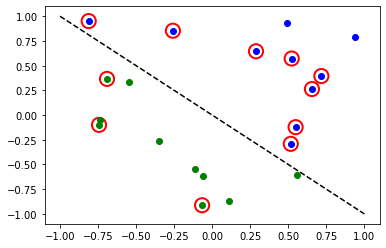

In [39]:
# Necessary imports

import numpy as np
import matplotlib.pyplot as plt

from torch import Tensor
from torch.nn import Linear, CrossEntropyLoss, MSELoss
from torch.optim import LBFGS

from qiskit import Aer, QuantumCircuit
from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit.opflow import AerPauliExpectation
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit_machine_learning.neural_networks import CircuitQNN, TwoLayerQNN
from qiskit_machine_learning.connectors import TorchConnector

# Set seed for random generators
algorithm_globals.random_seed = 42

# declare quantum instance
qi = QuantumInstance(Aer.get_backend("aer_simulator_statevector"))

# Generate random dataset

# Select dataset dimension (num_inputs) and size (num_samples)
num_inputs = 2
num_samples = 20

# Generate random input coordinates (X) and binary labels (y)
X = 2 * algorithm_globals.random.random([num_samples, num_inputs]) - 1
y01 = 1 * (np.sum(X, axis=1) >= 0)  # in { 0,  1}, y01 will be used for CircuitQNN example
y = 2 * y01 - 1  # in {-1, +1}, y will be used for OplowQNN example

# Convert to torch Tensors
X_ = Tensor(X)
y01_ = Tensor(y01).reshape(len(y)).long()
y_ = Tensor(y).reshape(len(y), 1)

# Define feature map and ansatz
feature_map = ZZFeatureMap(num_inputs)
ansatz = RealAmplitudes(num_inputs, entanglement="linear", reps=1)

# Define quantum circuit of num_qubits = input dim
# Append feature map and ansatz
qc = QuantumCircuit(num_inputs)
qc.append(feature_map, range(num_inputs))
qc.append(ansatz, range(num_inputs))


# Define CircuitQNN and initial setup
parity = lambda x: "{:b}".format(x).count("1") % 2  # optional interpret function
output_shape = 2  # parity = 0, 1
qnn2 = CircuitQNN(
    qc,
    input_params=feature_map.parameters,
    weight_params=ansatz.parameters,
    interpret=parity,
    output_shape=output_shape,
    quantum_instance=qi,
)

# Set up PyTorch module
# Reminder: If we don't explicitly declare the initial weights
# they are chosen uniformly at random from [-1, 1].
initial_weights = 0.1 * (2 * algorithm_globals.random.random(qnn2.num_weights) - 1)
model2 = TorchConnector(qnn2, initial_weights)

# Define model, optimizer, and loss
optimizer = LBFGS(model2.parameters())
f_loss = CrossEntropyLoss()  # Our output will be in the [0,1] range

# Start training
model2.train()

# Define LBFGS closure method (explained in previous section)
def closure():
    optimizer.zero_grad(set_to_none=True)  # Initialize gradient
    loss = f_loss(model2(X_), y01_)  # Calculate loss
    loss.backward()  # Backward pass
    return loss


# Run optimizer (LBFGS requires closure)
optimizer.step(closure);

# Evaluate model and compute accuracy
y_predict = []
for x in X:
    output = model2(Tensor(x))
    y_predict += [np.argmax(output.detach().numpy())]

print("Accuracy:", sum(y_predict == y01) / len(y01))

# plot results
# red == wrongly classified
for x, y_target, y_ in zip(X, y01, y_predict):
    if y_target == 1:
        plt.plot(x[0], x[1], "bo")
    else:
        plt.plot(x[0], x[1], "go")
    if y_target != y_:
        plt.scatter(x[0], x[1], s=200, facecolors="none", edgecolors="r", linewidths=2)
plt.plot([-1, 1], [1, -1], "--", color="black")
plt.show()

# Low Level Applications - Qiskit Experiments (aka qiskit ignis)

**E.g. Randomised Benchmarking**  
A randomized benchmarking (RB) experiment consists of the generation of random Clifford circuits on the given qubits such that the unitary computed by the circuits is the identity. After running the circuits, the number of shots resulting in an error (i.e. an output different than the ground state) are counted, and from this data one can infer error estimates for the quantum device, by calculating the Error Per Clifford. See Qiskit Textbook for an explanation on the RB method

In [73]:
!pip install qiskit-experiments

Adding a job from a backend (aer_simulator) that is different than the current backend (fake_belem). The new backend will be used, but service is not changed if one already exists.


Gate error ratio: {'rz': 0.0, 'sx': 1.0, 'x': 1.0}


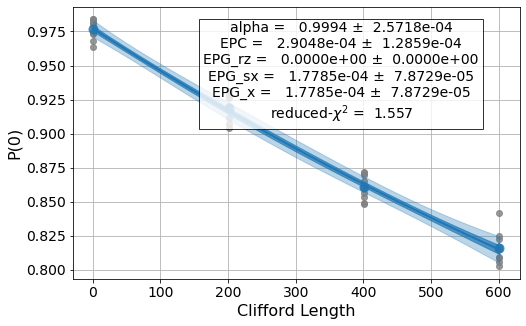

AnalysisResult
- name: @Parameters_RBAnalysis
- value: CurveFitResult:
 - fitting method: least_squares
 - number of sub-models: 1
  * F_rb_decay(x) = a * alpha ** x + b
 - success: True
 - number of function evals: 14
 - degree of freedom: 1
 - chi-square: 1.5572362575634966
 - reduced chi-square: 1.5572362575634966
 - Akaike info crit.: 2.2264730367302485
 - Bayesian info crit.: 0.38535612008992004
 - init params:
  * a = 0.4768135813224808
  * alpha = 0.9993167634958544
  * b = 0.5
 - fit params:
  * a = 0.5508343021377039 ± 0.2086215650934264
  * alpha = 0.9994190405787301 ± 0.0002571766188405303
  * b = 0.426368805967822 ± 0.20934000727419808
 - correlations:
  * (a, b) = -0.9999573876604689
  * (alpha, b) = -0.998720753168147
  * (a, alpha) = 0.9983704728950054
- quality: good
- device_components: ['Q0']
- verified: False
AnalysisResult
- name: alpha
- value: 0.99942+/-0.00026
- χ²: 1.5572362575634966
- quality: good
- device_components: ['Q0']
- verified: False
AnalysisResult
- 

In [76]:
import numpy as np
from qiskit_experiments.library import StandardRB, InterleavedRB
from qiskit_experiments.framework import ParallelExperiment, BatchExperiment
import qiskit.circuit.library as circuits
from qiskit.providers.fake_provider import FakeBelem


backend = FakeBelem()

lengths = np.arange(1, 800, 200)
num_samples = 10
seed = 1010
qubits = [0]

# Run an RB experiment on qubit 0
exp1 = StandardRB(qubits, lengths, num_samples=num_samples, seed=seed)
expdata1 = exp1.run(backend).block_for_results()
results1 = expdata1.analysis_results()

# View result data
print("Gate error ratio: %s" % expdata1.experiment.analysis.options.gate_error_ratio)
display(expdata1.figure(0))
for result in results1:
    print(result)

# What Next?

![](community_links.png)